For documentation and comments see the document 'Chemfit_example_with_functions'.
This is the cleaned up version for convenient use.

In [1]:
import chemfit
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in and read your data
data_323_1_1 = pd.read_csv('CSVs/sim_kinetics_323_1_1.csv')
data_323_1_1 = data_323_1_1.drop('Unnamed: 0', axis=1)

data_323_4_2 = pd.read_csv('CSVs/sim_kinetics_323_4_2.csv')
data_323_4_2 = data_323_4_2.drop('Unnamed: 0', axis=1)

data_323_8_1p5 = pd.read_csv('CSVs/sim_kinetics_323_8_1.5.csv')
data_323_8_1p5 = data_323_8_1p5.drop('Unnamed: 0', axis=1)

data_363_1_1 = pd.read_csv('CSVs/sim_kinetics_363_1_1.csv')
data_363_1_1 = data_363_1_1.drop('Unnamed: 0', axis=1)

data_363_4_2 = pd.read_csv('CSVs/sim_kinetics_363_4_2.csv')
data_363_4_2 = data_363_4_2.drop('Unnamed: 0', axis=1)

data_363_8_1p5 = pd.read_csv('CSVs/sim_kinetics_363_8_1.5.csv')
data_363_8_1p5 = data_363_8_1p5.drop('Unnamed: 0', axis=1)

data_393_1_1 = pd.read_csv('CSVs/sim_kinetics_393_1_1.csv')
data_393_1_1 = data_393_1_1.drop('Unnamed: 0', axis=1)

data_393_4_2 = pd.read_csv('CSVs/sim_kinetics_393_4_2.csv')
data_393_4_2 = data_393_4_2.drop('Unnamed: 0', axis=1)

data_393_8_1p5 = pd.read_csv('CSVs/sim_kinetics_393_8_1.5.csv')
data_393_8_1p5 = data_393_8_1p5.drop('Unnamed: 0', axis=1)

data_list = [data_323_1_1,data_323_4_2,data_323_8_1p5,
            data_363_1_1,data_363_4_2,data_363_8_1p5,
            data_393_1_1,data_393_4_2,data_393_8_1p5,]
new_list = []
for data in data_list:
    new_list.append(data.rename(columns={" A2":"A2"}))

data_list = new_list

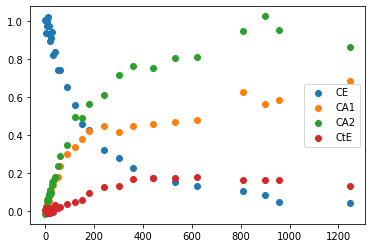

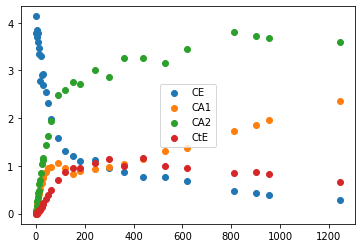

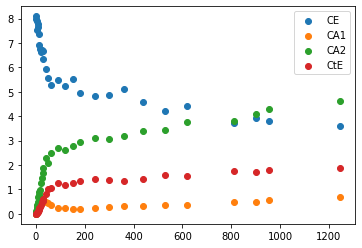

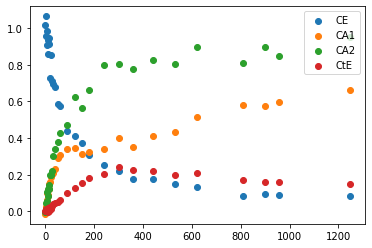

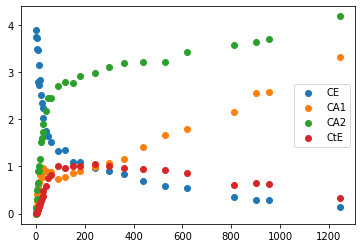

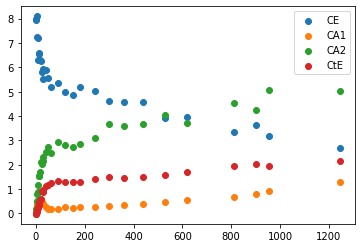

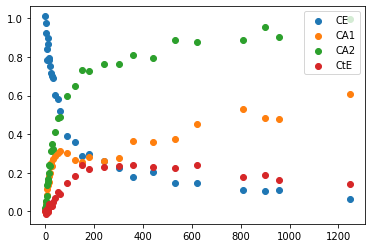

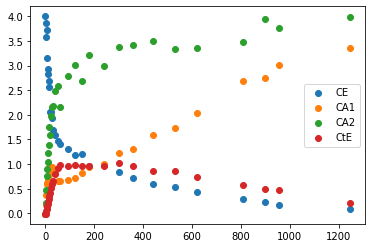

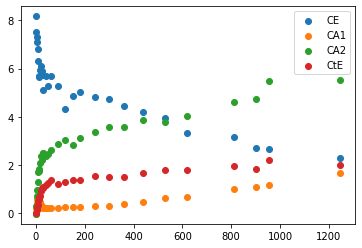

In [3]:
for data in data_list:
    plt.figure()
    plt.scatter(data['time'],data['E'], label ='CE')
    plt.scatter(data['time'],data['A1'], label ='CA1')
    plt.scatter(data['time'],data['A2'], label ='CA2')
    plt.scatter(data['time'],data['tE'], label ='CtE')
    plt.legend()

In [4]:
def diff(x, init, rate_const):
    CE, CA1, CA2, CtE,Cprecat, Ccat, Ccatdead = init
    k1, k2f, k2b, k3, k4, k5= rate_const['k1'],rate_const['k2f'],rate_const['k2b'],rate_const['k3'],rate_const['k4'],rate_const['k5']
    dEdt = -k1*CE*Cprecat - k2f*CE*CA1 + k2b*CtE*CA2
    dA1dt = k1*CE*Cprecat - k2f*CE*CA1 + k2b*CtE*CA2 + 2*k3*CtE*Cprecat
    dA2dt = k1*CE*Cprecat + k2f*CE*CA1 - k2b*CtE*CA2
    dtEdt = k2f*CE*CA1 - k2b*CtE*CA2 - k3*CtE*Cprecat
    dprecatdt = -k1*CE*Cprecat - k3*CtE*Cprecat + k4*Ccat*0.04 - k5*Cprecat
    dcatdt = k1*CE*Cprecat + k3*CtE*Cprecat - k4*Ccat*0.04
    dcatdeaddt = k5*Cprecat
    return dEdt, dA1dt, dA2dt, dtEdt, dprecatdt, dcatdt,dcatdeaddt

In [5]:
data = data_list
temperatures = [323,323,323,363,363,363,393,393,393]
initial_conditions = [[1,0,0,0,1,0,0],[4,0,0,0,2,0,0],[8,0,0,0,1.5,0,0],
                      [1,0,0,0,1,0,0],[4,0,0,0,2,0,0],[8,0,0,0,1.5,0,0],
                      [1,0,0,0,1,0,0],[4,0,0,0,2,0,0],[8,0,0,0,1.5,0,0],]
                      
rates = ['k1','k2f','k2b','k3','k4','k5']
test = chemfit.fitting_set(diff,data,temperatures,initial_conditions, rates)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:11 ETA:  00:00:00

score is 6.301484602711203 out of 8 for T: 363
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1000
    # data points      = 6
    # variables        = 6
    chi-square         = 17.3097273
    reduced chi-square = 17.3097273
    Akaike info crit   = 18.3570549
    Bayesian info crit = 17.1076117
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k1:   0.01163930 (init = 0.01)
    k2f:  0.01579702 (init = 0.01)
    k2b:  0.00463546 (init = 0.01)
    k3:   0.11885125 (init = 0.01)
    k4:   0.03183364 (init = 0.01)
    k5:   0.01360145 (init = 0.01)


<Figure size 432x288 with 0 Axes>

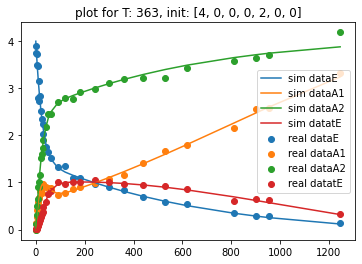

In [6]:
test.fit_sys(4, iterations = 1000)

  0% (6 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:00:20

score is 17.11053957579987 out of 24 for T: 323
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1000
    # data points      = 6
    # variables        = 6
    chi-square         = 284.787990
    reduced chi-square = 284.787990
    Akaike info crit   = 35.1599132
    Bayesian info crit = 33.9104700
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k1:   0.00595668 (init = 0.01)
    k2f:  0.00874671 (init = 0.01)
    k2b:  0.00226911 (init = 0.01)
    k3:   0.05917773 (init = 0.01)
    k4:   0.01979991 (init = 0.01)
    k5:   0.00512531 (init = 0.01)


  0% (6 of 1000) |                       | Elapsed Time: 0:00:00 ETA:   0:00:17

score is 17.167570956363182 out of 24 for T: 363
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1000
    # data points      = 6
    # variables        = 6
    chi-square         = 280.092520
    reduced chi-square = 280.092520
    Akaike info crit   = 35.0601630
    Bayesian info crit = 33.8107199
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k1:   0.01169053 (init = 0.01)
    k2f:  0.01543361 (init = 0.01)
    k2b:  0.00446437 (init = 0.01)
    k3:   0.09166206 (init = 0.01)
    k4:   0.03291783 (init = 0.01)
    k5:   0.01260119 (init = 0.01)


 80% (805 of 1000) |################     | Elapsed Time: 0:00:32 ETA:   0:00:09

score is 18.148495388266575 out of 24 for T: 393
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 804
    # data points      = 6
    # variables        = 6
    chi-square         = 205.440637
    reduced chi-square = 205.440637
    Akaike info crit   = 33.2003859
    Bayesian info crit = 31.9509427
##  Warning: uncertainties could not be estimated:
[[Variables]]
    k1:   0.01747648 +/-        nan (nan%) (init = 0.01)
    k2f:  0.02260764 +/- 1.5850e+10 (70108480674971.92%) (init = 0.01)
    k2b:  0.00691772 +/-        nan (nan%) (init = 0.01)
    k3:   0.11719244 +/- 0.00000000 (0.00%) (init = 0.01)
    k4:   0.04345851 +/- 1.2551e+10 (28881354184701.02%) (init = 0.01)
    k5:   0.02189217 +/- 3.2309e+09 (14758113475517.72%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(k3, k5)  = -inf
    C(k2f, k3) = -inf
    C(k2f, k5) = -1.334
    C(k2f, k4) =  1.155
    C(k4, k5)  = -0.735


<Figure size 432x288 with 0 Axes>

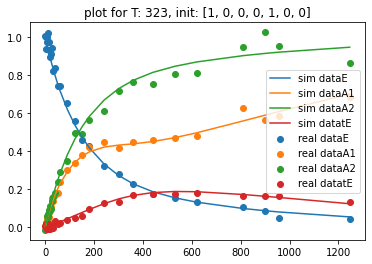

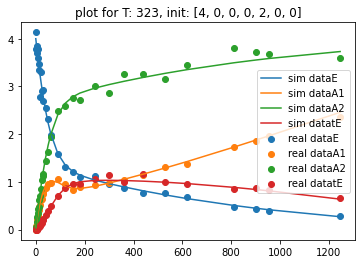

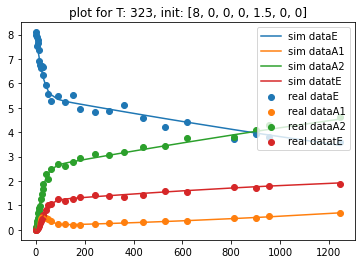

<Figure size 432x288 with 0 Axes>

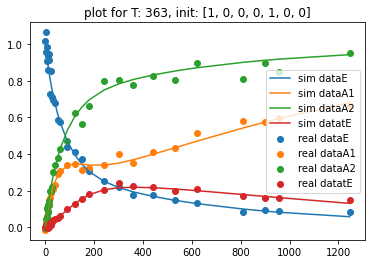

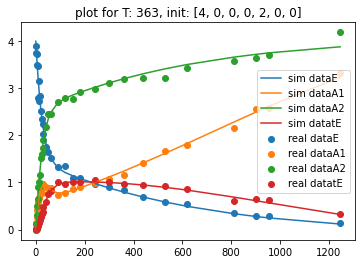

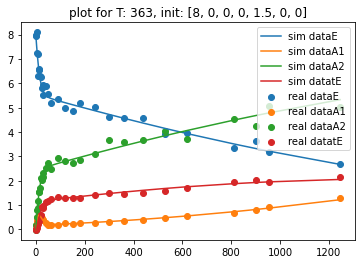

<Figure size 432x288 with 0 Axes>

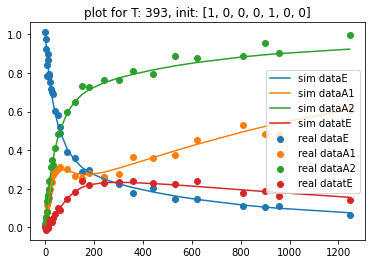

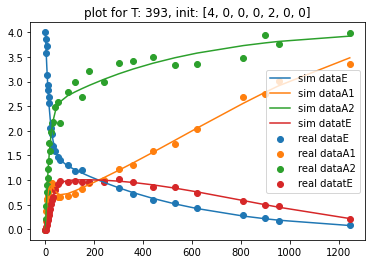

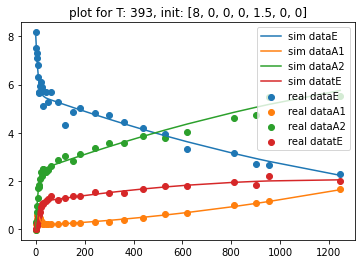

In [7]:
test.fit_sys_all(iterations = 1000)

 11% (111 of 1000) |##                   | Elapsed Time: 0:00:11 ETA:   0:01:33

score is 52.42229687837465 out of 72
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 110
    # data points      = 12
    # variables        = 12
    chi-square         = 4599.43751
    reduced chi-square = 4599.43751
    Akaike info crit   = 95.3853917
    Bayesian info crit = 101.204272
##  Warning: uncertainties could not be estimated:
[[Variables]]
    E1:   16236.5222 (init = 16247.34)
    k1:   0.01749863 (init = 0.01747648)
    E2f:  14276.7349 (init = 14271.09)
    k2f:  0.02248088 (init = 0.02260764)
    E2b:  16896.0945 (init = 16775.9)
    k2b:  0.00692648 (init = 0.006917723)
    E3:   10319.1755 (init = 10336.28)
    k3:   0.11788532 (init = 0.1171924)
    E4:   11815.8887 (init = 11903.75)
    k4:   0.04363979 (init = 0.04345851)
    E5:   21895.8094 (init = 21893.65)
    k5:   0.02187422 (init = 0.02189217)


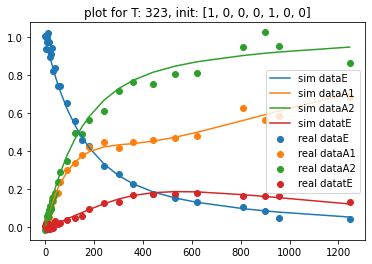

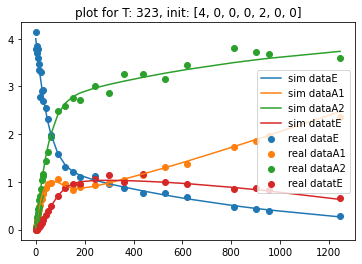

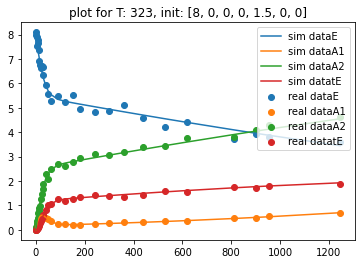

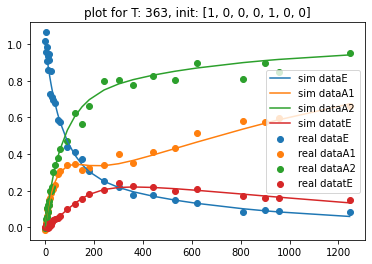

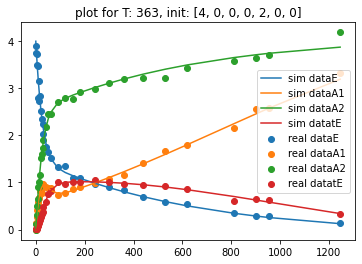

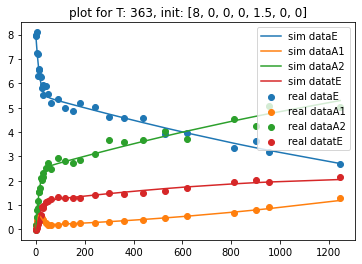

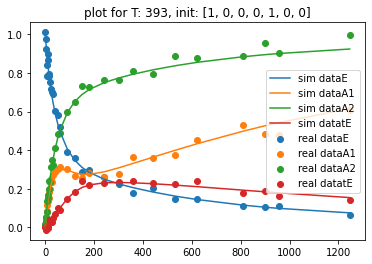

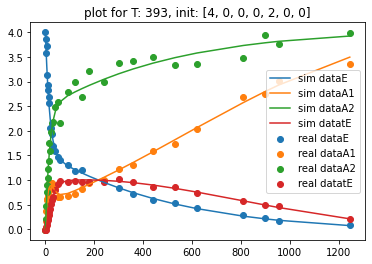

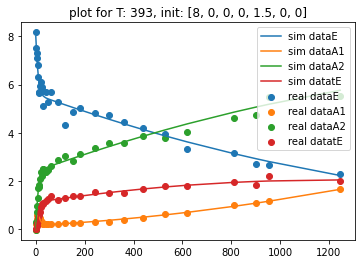

In [8]:
result = test.fit_sys_full(iterations = 1000)

In [9]:
frame = display(result)

,rate,E_act,T=393,Arrhenius constant,T=323,T=363
0,k1,16236.522221,0.017499,2.518372,0.005961,0.011605
1,k2f,14276.734935,0.022481,1.775985,0.008721,0.015667
2,k2b,16896.094527,0.006926,1.219824,0.002258,0.004518
3,k3,10319.175536,0.117885,2.773687,0.059458,0.090804
4,k4,11815.888676,0.043640,1.623377,0.019931,0.032366
5,k5,21895.809360,0.021874,17.793691,0.005119,0.012572
